In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [9]:
from qiskit import *

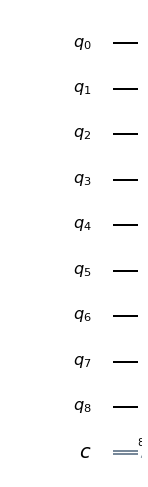

In [10]:
secretcode = '11010010'
n = len(secretcode)
circuit = QuantumCircuit(n+1, n)
circuit.draw(output='mpl')

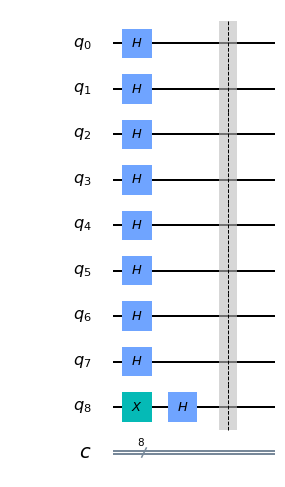

In [11]:
circuit.h(range(n))
circuit.x(n)
circuit.h(n)
circuit.barrier()
circuit.draw(output='mpl')

In [12]:
for ii, yesno in enumerate(reversed(secretcode)):
    if yesno == '1':
        circuit.cx(ii, n)
circuit.barrier()

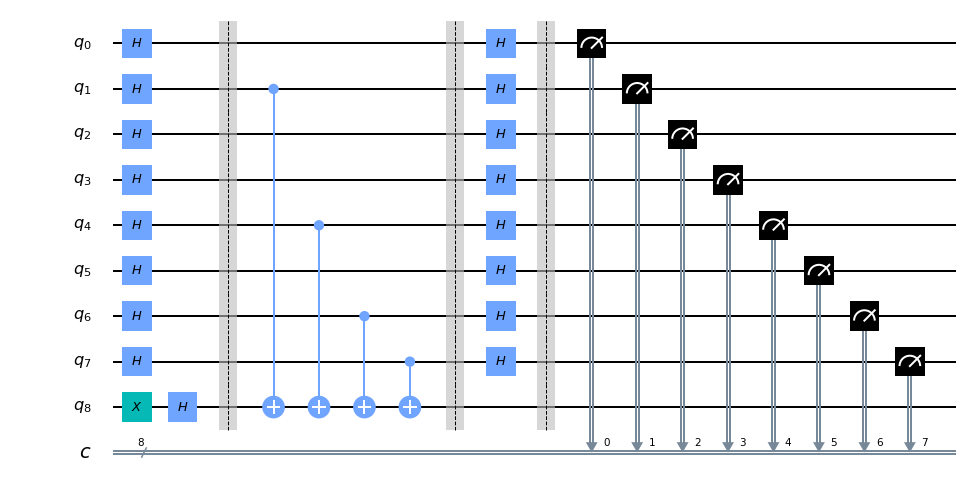

In [13]:
circuit.h(range(n))
circuit.barrier()
circuit.measure(range(n), range(n))
circuit.draw(output='mpl')

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'11010010': 1}
